<a href="https://www.kaggle.com/code/caruazu/preprocessamento-de-dados-raiox?scriptVersionId=126072371" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Preprocessamento de exames de imagem

Preprocessamento de exames de raio-x, aplicando técnicas como nomalização de histogramas. O objetivo final é reduzir o ruído antes de possíveis aplicações de aprendizado de máquina

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL

In [2]:
# configurações de visualização
def mostre_raiox(raiox):
    plt.figure()
    plt.imshow(raiox)
    plt.show()

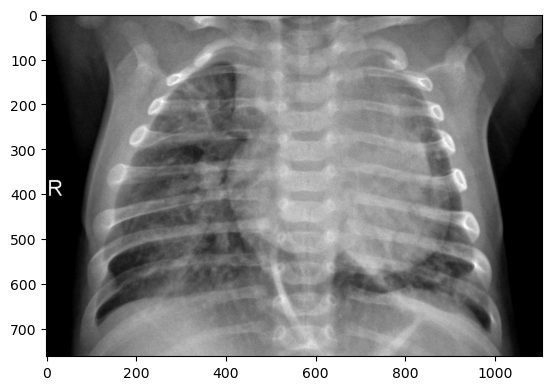

In [3]:
# exemplo de imagem
exemplo = cv2.imread('/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg')

mostre_raiox(exemplo)

In [4]:
def padronizador(endereco_img):    
    img = cv2.imread(endereco_img,0)
    
    # corte
    height, width = img.shape[:2]
    size = min(height, width)
    x = (width - size) // 2
    y = (height - size) // 2
    img_quadrada = img[y:y+size, x:x+size]

    # escala
    img_quadrada_pequena = cv2.resize(
        img_quadrada,
        (500, 500),
        interpolation = cv2.INTER_CUBIC
    )
    
    # equalização    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img_quadrada_pequena_equalizada = clahe.apply(img_quadrada_pequena)
    
    return img_quadrada_pequena_equalizada

In [5]:
# quantas imagens temos?
imagems_treino_endereco = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/"

for nome_pasta in ['NORMAL','PNEUMONIA']:
    arquivos_lista = os.listdir(imagems_treino_endereco+nome_pasta)
    arquivos_num = len(arquivos_lista)
    print(nome_pasta+': '+str(arquivos_num))

NORMAL: 1341
PNEUMONIA: 3875


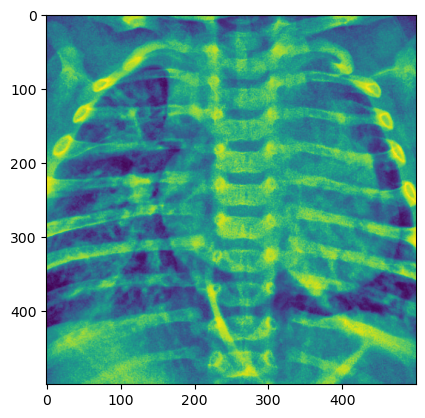

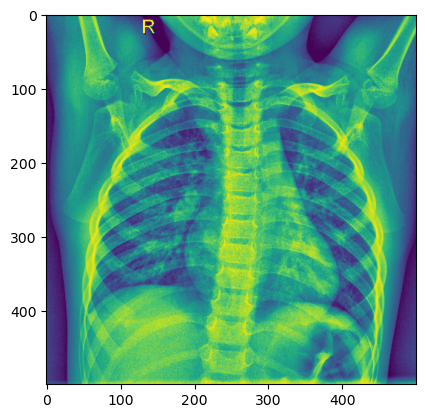

In [6]:
img1= '/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg'
img2= '/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0115-0001.jpeg'


for endereco in [img1,img2]:

    directory = os.path.dirname(endereco)
    filename = os.path.basename(endereco)
    
    img_nova = padronizador(endereco)
    mostre_raiox(img_nova)
    
    endereco_novo = "/kaggle/working/imagens_tratadas/"+"nova_"+filename
    cv2.imwrite(endereco_novo, img_nova)

In [7]:
# pasta = "/kaggle/working/"

# os.mkdir(pasta+"imagens_tratadas")

# arquivos_lista = os.listdir(pasta+"imagens_tratadas")
# print(arquivos_lista)